___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 Data Cleaning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Settings

In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

## Reading scout_car.json file as a dataframe named df

In [3]:
df = pd.read_csv("filled_scout.csv")

### Creating a copy from df named df_copy

In [4]:
df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [5]:
# Checking the head of df

df.head()

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
0,Audi A1,Sedans,15770.0,VAT deductible,56013.0,2.0,Used,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,66.0,Yes,12.0,Cloth,Black,1220.0,3.8,3.0
1,Audi A1,Sedans,14500.0,Price negotiable,80000.0,1.0,Used,Red,Metallic,3.0,4.0,Automatic,1800.0,4.0,front,Benzine,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,141.0,No,12.0,Cloth,Grey,1255.0,5.6,2.0
2,Audi A1,Sedans,14640.0,VAT deductible,83450.0,1.0,Used,Black,Metallic,4.0,4.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,85.0,No,12.0,Cloth,Black,1135.0,3.8,3.0
3,Audi A1,Sedans,14500.0,Unknown,73000.0,1.0,Used,Brown,Metallic,3.0,4.0,Automatic,1400.0,3.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,66.0,No,12.0,Cloth,Black,1195.0,3.8,3.0
4,Audi A1,Sedans,16790.0,Unknown,16200.0,1.0,Used,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.0,66.0,Yes,12.0,Cloth,Black,1135.0,4.1,3.0


In [6]:
# Checking the tail of df

df.tail()

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
15914,Renault Espace,Van,39950.0,VAT deductible,16.987484,0.0,New,Grey,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel (Particulate Filter),139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,147.0,Yes,24.0,Full leather,Brown,1758.0,5.3,0.0
15915,Renault Espace,Van,39885.0,VAT deductible,9900.000000,1.0,Used,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,front,Benzine (Particulate Filter),168.0,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,165.0,Yes,24.0,Cloth,Black,1708.0,7.4,0.0
15916,Renault Espace,Van,39875.0,VAT deductible,15.000000,1.0,Pre-registered,White,Metallic,5.0,7.0,Automatic,2000.0,4.0,front,Diesel,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,146.0,Yes,24.0,Full leather,Black,1734.0,5.3,0.0
15917,Renault Espace,Van,39700.0,VAT deductible,10.000000,1.0,Pre-registered,Grey,Metallic,5.0,7.0,Automatic,2000.0,4.0,front,Diesel,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,147.0,Yes,24.0,Part leather,Black,1758.0,5.3,0.0
15918,Renault Espace,Van,40999.0,VAT deductible,3373.867550,1.0,Demonstration,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",6.0,165.0,Yes,24.0,Full leather,Brown,1685.0,6.8,0.0


In [7]:
# Checking the df by taking samples

df.sample(10)

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
7794,Opel Astra,Station wagon,21815.0,VAT deductible,16.987484,0.0,New,Black,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),126.0,Euro 6d-TEMP,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter,Roof rack,Tou...","Central door lock,Daytime running lights,Drive...",6.0,100.0,Yes,24.0,Cloth,Other,1456.0,4.8,0.0
12161,Opel Insignia,Station wagon,20960.0,VAT deductible,35304.000000,1.0,Used,Grey,Metallic,5.0,5.0,Manual,2000.0,4.0,front,Diesel (Particulate Filter),148.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Adaptive headlights,Central door lock,Dayt...",6.0,125.0,Yes,12.0,Cloth,Black,1633.0,5.6,1.0
13394,Renault Clio,Sedans,8900.0,Unknown,89910.000000,1.0,Used,Silver,Uni/basic,5.0,5.0,Automatic,1500.0,4.0,front,Diesel (Particulate Filter),92.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Central door lock with r...",6.0,66.0,No,12.0,Cloth,Black,1165.0,3.5,2.0
15896,Renault Espace,Van,41900.0,VAT deductible,5000.000000,1.0,Used,Grey,Metallic,5.0,7.0,Automatic,1600.0,4.0,front,Diesel,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,MP3,On-board computer,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,118.0,Yes,60.0,Full leather,Grey,1734.0,4.7,2.0
13741,Renault Clio,Compact,6800.0,Unknown,34000.000000,1.0,Used,White,Metallic,4.0,5.0,Manual,1100.0,4.0,front,Benzine,133.0,Euro 6,"Cruise control,Electrical side mirrors,Power w...","CD player,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,54.0,No,12.0,Cloth,Black,1087.0,5.6,3.0
9379,Opel Corsa,Sedans,8900.0,VAT deductible,42619.000000,1.0,Used,Silver,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine,120.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Touch screen,Voice Co...","ABS,Central door lock with remote control,Driv...",5.0,66.0,No,24.0,Cloth,Grey,1163.0,5.1,2.0
4661,Audi A3,Sedans,22900.0,VAT deductible,16000.000000,1.0,Used,Grey,Metallic,4.0,5.0,Automatic,1600.0,4.0,front,Diesel,105.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",7.0,85.0,Yes,12.0,Cloth,Black,1290.0,4.0,1.0
14562,Renault Clio,Sedans,10490.0,VAT deductible,8358.000000,1.0,Used,White,Metallic,5.0,5.0,Manual,1100.0,4.0,front,Benzine,127.0,Euro 6,Cruise control,"Bluetooth,Digital radio,Hands-free equipment,O...",Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",5.0,55.0,Yes,12.0,Cloth,Black,1566.0,5.6,1.0
15655,Renault Espace,Van,36400.0,Unknown,131.000000,1.0,Used,Grey,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),120.0,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Handicapped enabled,Roof rack,Tou...","ABS,Central door lock,Daytime running lights,D...",6.0,118.0,Yes,30.0,Full leather,Brown,1809.0,4.0,1.0
4659,Audi A3,Sedans,22900.0,VAT deductible,13450.000000,1.0,Employee's car,White,Uni/basic,4.0,5.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),105.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Cent

## Checking the summary information of df

In [8]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  float64
 3   vat                  15919 non-null  object 
 4   km                   15919 non-null  float64
 5   prev_owner           15919 non-null  float64
 6   type                 15919 non-null  object 
 7   body_color           15919 non-null  object 
 8   paint_type           15919 non-null  object 
 9   nr_of_doors          15919 non-null  float64
 10  nr_of_seats          15919 non-null  float64
 11  gearing_type         15919 non-null  object 
 12  displacement_cc      15919 non-null  float64
 13  cylinders            15919 non-null  float64
 14  drive_chain          15919 non-null  object 
 15  fuel                 15919 non-null 

## Checking the null values of df

In [9]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
prev_owner             0
type                   0
body_color             0
paint_type             0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
displacement_cc        0
cylinders              0
drive_chain            0
fuel                   0
co_2_emission          0
emission_class         0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
hp_kw                  0
insp_new               0
warranty_month         0
upholstery_type        0
upholstery_color       0
weight_kg              0
consumption_comb       0
age                    0
dtype: int64

## Checking the duplicated values in df

In [10]:
df.duplicated

# As it is seen below, there is not any duplicated values.

<bound method DataFrame.duplicated of            make_model body_type    price               vat            km  \
0             Audi A1    Sedans  15770.0    VAT deductible  56013.000000   
1             Audi A1    Sedans  14500.0  Price negotiable  80000.000000   
2             Audi A1    Sedans  14640.0    VAT deductible  83450.000000   
3             Audi A1    Sedans  14500.0           Unknown  73000.000000   
4             Audi A1    Sedans  16790.0           Unknown  16200.000000   
...               ...       ...      ...               ...           ...   
15914  Renault Espace       Van  39950.0    VAT deductible     16.987484   
15915  Renault Espace       Van  39885.0    VAT deductible   9900.000000   
15916  Renault Espace       Van  39875.0    VAT deductible     15.000000   
15917  Renault Espace       Van  39700.0    VAT deductible     10.000000   
15918  Renault Espace       Van  40999.0    VAT deductible   3373.867550   

       prev_owner            type body_color pain

# PART- 2 `( Handling With Missing Values )`

In [11]:
# Önceki dosyada

# PART- 3 `( Handling With Outliers )`

In [12]:
df_numeric= df.select_dtypes(exclude=["object"])

In [13]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             15919 non-null  float64
 1   km                15919 non-null  float64
 2   prev_owner        15919 non-null  float64
 3   nr_of_doors       15919 non-null  float64
 4   nr_of_seats       15919 non-null  float64
 5   displacement_cc   15919 non-null  float64
 6   cylinders         15919 non-null  float64
 7   co_2_emission     15919 non-null  float64
 8   gears             15919 non-null  float64
 9   hp_kw             15919 non-null  float64
 10  warranty_month    15919 non-null  float64
 11  weight_kg         15919 non-null  float64
 12  consumption_comb  15919 non-null  float64
 13  age               15919 non-null  float64
dtypes: float64(14)
memory usage: 1.7 MB


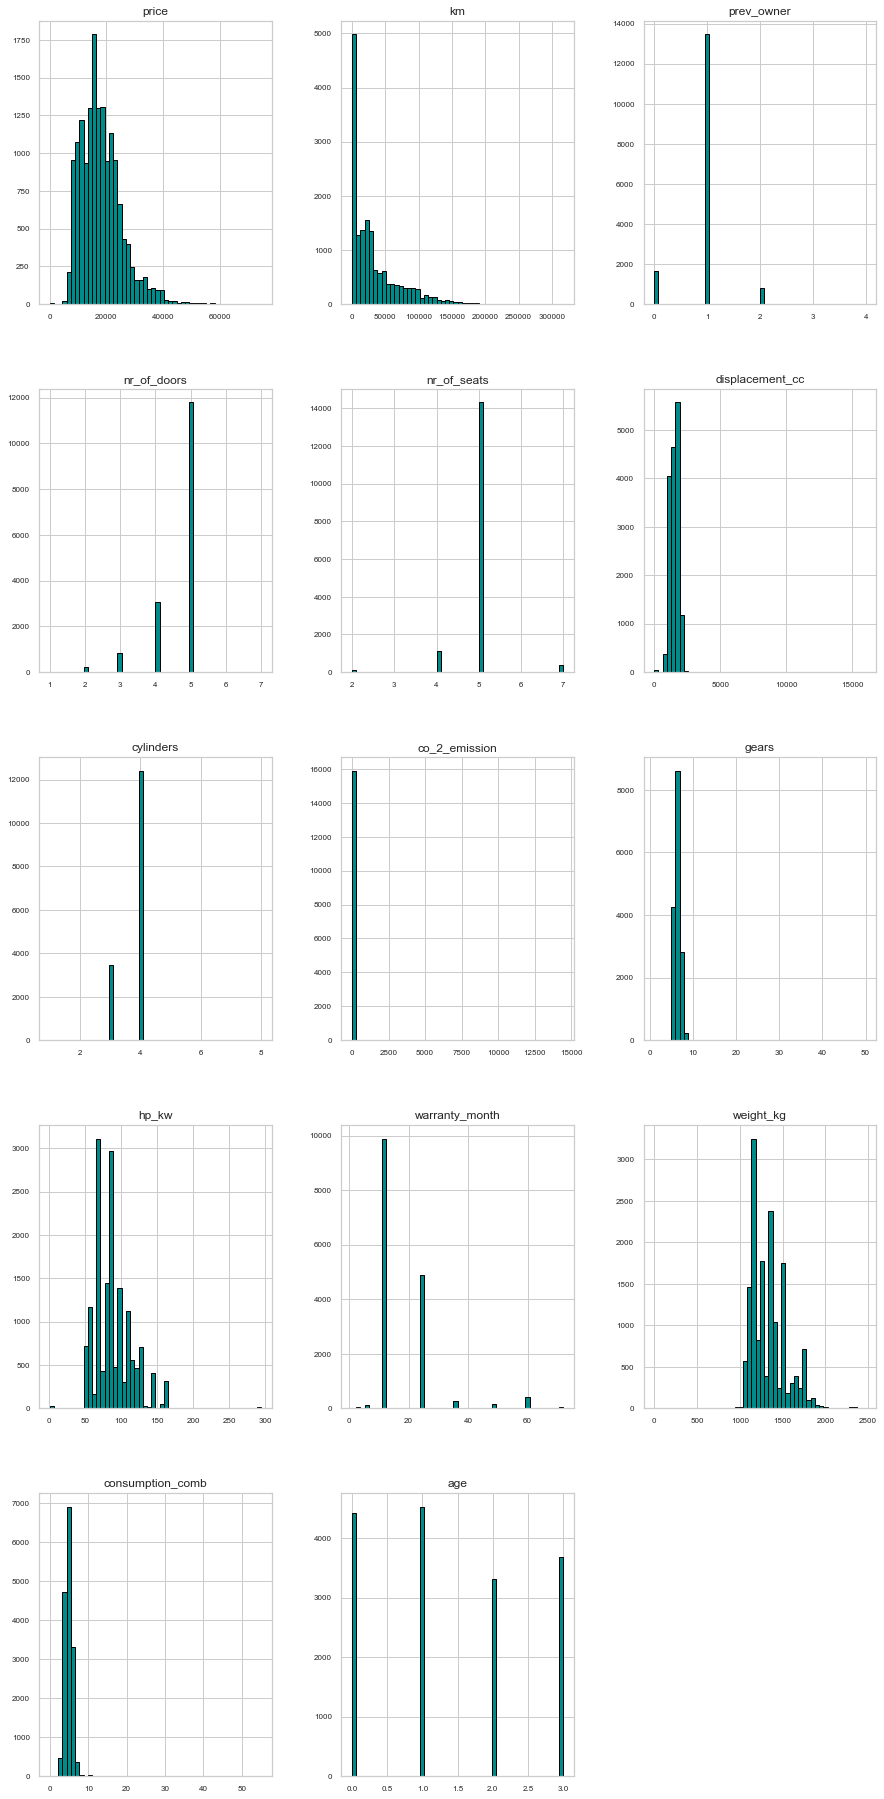

In [14]:
fig_ = df_numeric.hist(figsize=(15, 100), layout=(15,3),
                         bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

## box plots for numeric columns

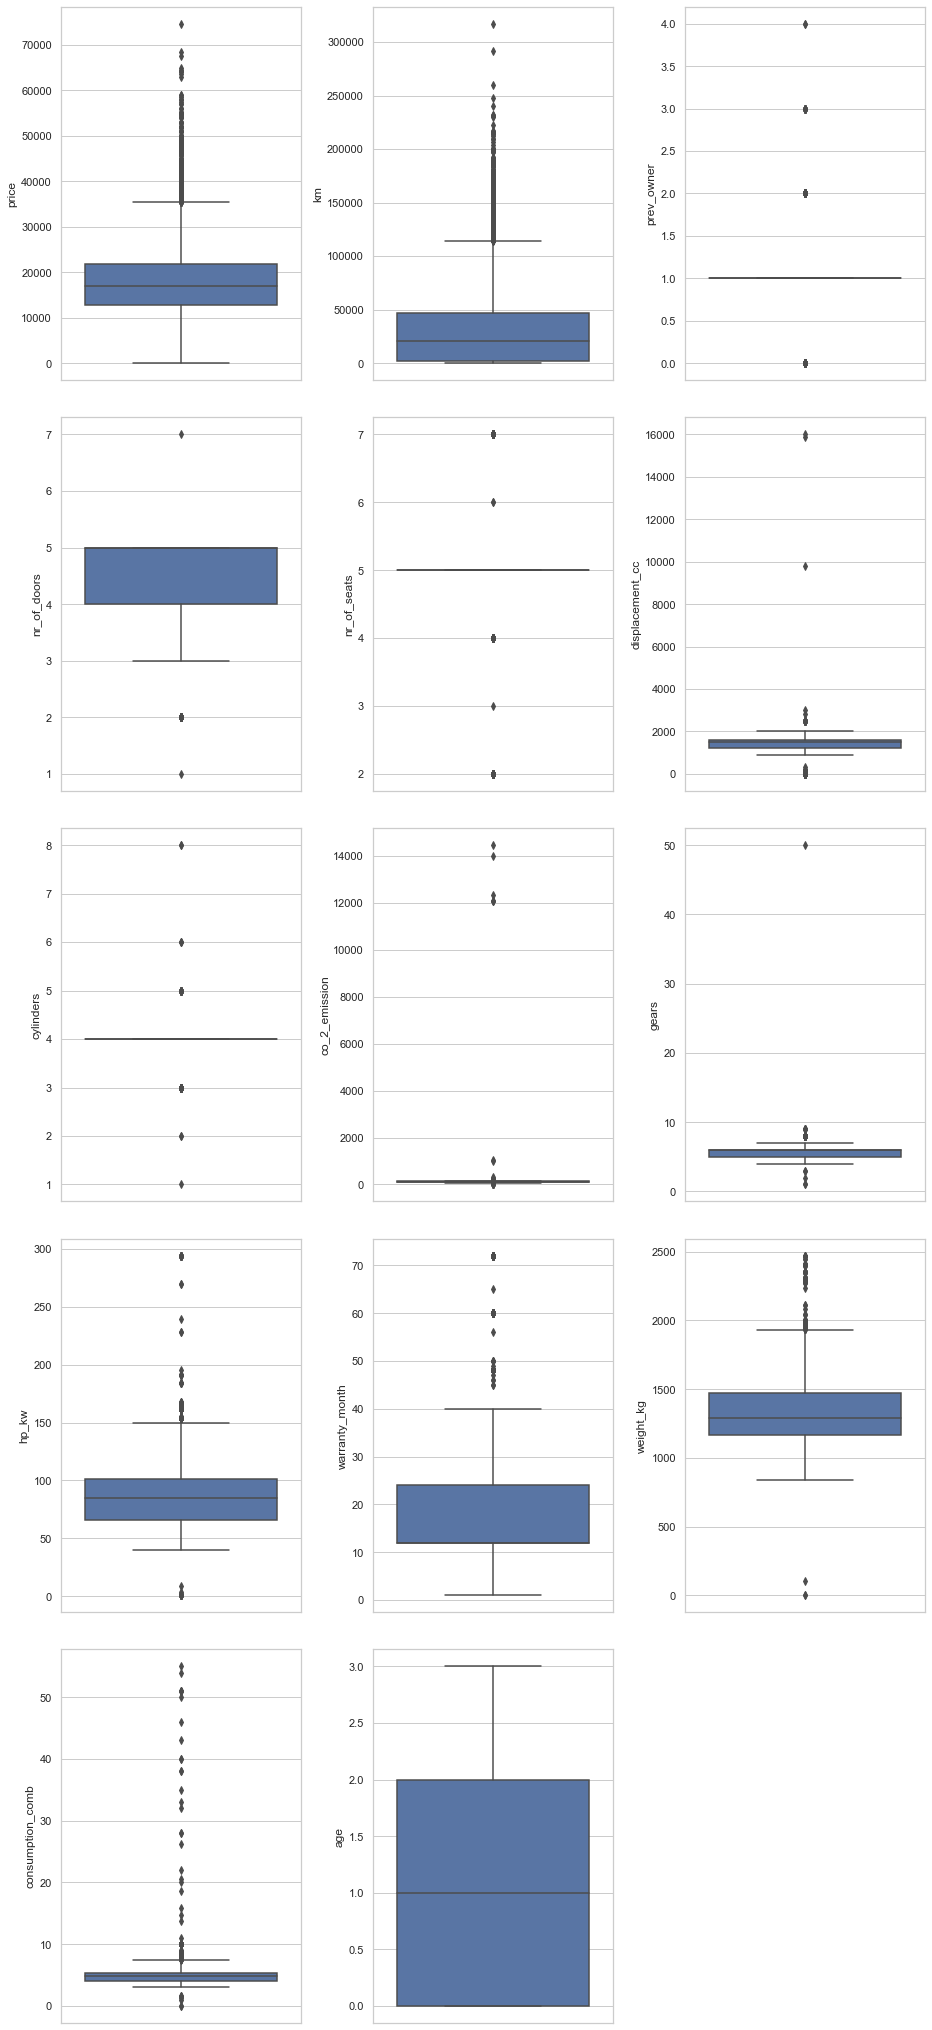

In [34]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.1)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.boxplot(y=col, data=df_numeric)

## nr_of_doors column

In [41]:
df[df_numeric.nr_of_doors==1]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
13782,Renault Clio,Compact,8500.0,VAT deductible,41493.0,1.0,Used,White,Metallic,1.0,5.0,Manual,1500.0,4.0,front,Diesel,92.0,Euro 6,"Air conditioning,Cruise control,Hill Holder,Mu...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,55.0,No,12.0,Cloth,Black,1087.0,3.15,3.0


In [45]:
df[df_numeric.nr_of_doors==2]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
26,Audi A1,Compact,11444.0,VAT deductible,84029.0,1.0,Used,Blue,Metallic,2.0,4.0,Manual,1000.0,3.0,front,Benzine,97.0,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,70.0,Yes,12.0,Cloth,Black,1180.0,4.2,3.0
44,Audi A1,Sedans,11490.0,VAT deductible,44120.0,1.0,Used,Black,Metallic,2.0,5.0,Manual,1400.0,3.0,front,Diesel (Particulate Filter),94.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,66.0,No,12.0,Cloth,Black,1135.0,3.6,3.0
48,Audi A1,Compact,11490.0,Unknown,58000.0,2.0,Used,Black,Metallic,2.0,4.0,Manual,1000.0,3.0,front,Benzine,102.0,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,CD player","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",5.0,60.0,Yes,12.0,Part leather,Black,1180.0,4.4,3.0
55,Audi A1,Compact,10999.0,VAT deductible,69500.0,1.0,Used,Black,Metallic,2.0,4.0,Manual,1000.0,3.0,front,Benzine,102.0,Euro 5,"Air conditioning,Armrest,Automatic climate con...",CD player,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,70.0,No,12.0,Cloth,Black,1180.0,4.4,2.0
56,Audi A1,Compact,10900.0,VAT deductible,43500.0,1.0,Used,White,Metallic,2.0,4.0,Manual,1000.0,3.0,front,Benzine,97.0,Euro 6,"Air conditioning,Electrical side mirrors,Power...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,60.0,No,12.0,Cloth,Black,1180.0,4.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10304,Opel Corsa,Compact,10499.0,Unknown,325.0,0.0,New,Red,Metallic,2.0,4.0,Manual,1200.0,4.0,front,Benzine,126.0,Euro 6d-TEMP,"Air conditioning,Electrical side mirrors,Power...",Radio,"Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",5.0,51.0,Yes,24.0,Cloth,Black,1163.0,5.4,0.0
10314,Opel Corsa,Compact,9990.0,VAT deductible,100.0,0.0,New,Blue,Metallic,2.0,5.0,Manual,1200.0,4.0,front,Benzine (Particulate Filter),126.0,Euro 6d-TEMP,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,On-bo...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",5.0,51.0,Yes,24.0,Cloth,Black,1163.0,5.4,0.0
10380,Opel Corsa,Compact,11290.0,VAT deductible,12.0,1.0,Pre-registered,Red,Metallic,2.0,5.0,Manual,1200.0,4.0,front,Benzine,126.0,Euro 6d-TEMP,"Air conditioning,Electrical side mirrors,Power...","Bluetooth,Hands-free equipment,Radio","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",5.0,51.0,Yes,24.0,Cloth,Black,1163.0,5.4,0.0
10413,Opel Corsa,Compact,11190.0,VAT deductible,10.0,1.0,Pre-registered,Blue,Metallic,2.0,5.0,Manual,1200.0,4.0,front,Benzine,126.0,Euro 6d-TEMP,"Air conditioning,Electrical side mirrors,Hill ...","Radio,Sound system","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",5.0,51.0,Yes,24.0,Cloth,Black,1163.0,5.4,0.0


In [46]:
df[df_numeric.nr_of_doors==7]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
15202,Renault Espace,Van,21600.0,Price negotiable,78000.0,1.0,Used,Brown,Metallic,7.0,5.0,Automatic,1600.0,4.0,front,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,118.0,No,12.0,Full leather,Brown,1734.0,4.6,3.0


In [47]:
q1 = df_numeric.nr_of_doors.quantile(0.25)
q3 = df_numeric.nr_of_doors.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(2.5, 6.5)

In [49]:
nr_doors_1 = df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "nr_of_doors"].mode()[0]

In [52]:
nr_doors_7 = df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "nr_of_doors"].mode()[0]

In [57]:
df.nr_of_doors.replace(to_replace=[1,7], value=[nr_doors_1, nr_doors_7], inplace=True)

In [59]:
df.nr_of_doors.value_counts()

5.0    11789
4.0     3079
3.0      832
2.0      219
Name: nr_of_doors, dtype: int64

## nr_of_seats column

In [117]:
df[df.nr_of_seats==3]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
1636,Audi A1,Compact,23090.0,Unknown,9821.0,1.0,Used,Black,Metallic,2.0,3.0,Automatic,1800.0,4.0,front,Benzine,134.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.0,141.0,Yes,24.0,Part leather,Black,1180.0,5.8,1.0


In [118]:
df[df.nr_of_seats==6]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
582,Audi A1,Compact,13500.0,VAT deductible,100000.000000,1.0,Used,White,Metallic,5.0,6.0,Manual,1000.0,4.0,front,Benzine,104.0,Euro 6,Air conditioning,On-board computer,Alloy wheels,ABS,5.0,70.0,No,12.0,Cloth,Black,1500.0,4.3,2.0
15890,Renault Espace,Station wagon,42490.0,VAT deductible,16.987484,0.0,New,Black,Metallic,5.0,6.0,Automatic,2000.0,4.0,front,Diesel (Particulate Filter),168.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,147.0,Yes,24.0,Cloth,Other,1840.0,5.7,0.0


In [122]:
df[df.make_model=="Renault Espace"].head(50)

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
14928,Renault Espace,Van,17500.0,Unknown,141000.000000,1.0,Used,White,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,120.0,Euro 6,Air conditioning,"Bluetooth,Digital radio,Hands-free equipment,M...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,118.0,No,12.0,Full leather,Brown,1734.0,4.600000,3.0
14929,Renault Espace,Station wagon,17950.0,VAT deductible,99950.000000,1.0,Used,Brown,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),120.0,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,118.0,No,12.0,Full leather,Grey,1659.0,4.600000,3.0
14930,Renault Espace,Transporter,17950.0,VAT deductible,99950.000000,1.0,Used,Brown,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,120.0,Euro 6,"Air conditioning,Cruise control,Electrically a...","On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,118.0,No,12.0,Full leather,Brown,2353.0,4.700000,3.0
14931,Renault Espace,Van,17990.0,Unknown,109745.000000,1.0,Used,Black,Metallic,5.0,7.0,Automatic,1600.0,4.0,front,Diesel,120.0,Euro 6,Cruise control,"Bluetooth,Digital radio,Hands-free equipment,M...",Alloy wheels,"ABS,Driver-side airbag,Passenger-side airbag,S...",6.0,118.0,No,12.0,Full leather,Brown,1734.0,4.600000,3.0
14932,Renault Espace,Van,22600.0,VAT deductible,100000.000000,1.0,Used,Brown,Metallic,5.0,7.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Shift paddles,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,118.0,No,12.0,Full leather,Brown,1734.0,4.700000,3.0
14933,Renault Espace,Transporter,22500.0,Price negotiable,84000.000000,1.0,Used,Brown,Metallic,5.0,7.0,Automatic,1600.0,4.0,front,Diesel,120.0,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Roof rack,Sport suspension,Touch ...","ABS,Central door lock,Daytime running lights,E...",6.0,118.0,No,12.0,Full leather,Brown,1734.0,4.700000,3.0
14934,Renault Espace,Van,22690.0,Unknown,68021.000000,1.0,Used,Grey,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,120.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,119.0,No,6.0,Full leather,Brown,1734.0,4.650000,3.0
14935,Renault Espace,Van,22500.0,Unknown,32559.000000,1.0,Used,Bronze,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport package,Touch screen,Voice ...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.0,118.0,No,12.0,Part leather,Black,1734.0,4.700000,3.0
14936,Renault Espace,Off-Road,22500.0,Unknown,70000.000000,1.0,Used,Black,Metallic,5.0,7.0,Automatic,1600.0,4.0,front,Diesel (Particulate Filter),120.0,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Touch screen","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.0,118.0,No,12.0,Full leather,Black,1734.0,4.700000,2.0
14937,Renault Espace,Van,22990.0,VAT deductible,76950.000000,1.0,Used,Grey,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,120.0,Euro 6,Cruise control,"Bluetooth,Digital radio,Hands-free equipment,M...",Alloy wheels,"ABS,

In [123]:
##NOT: BUGÜNKÜ TOPLANTIDA SORULACAK 3 ve 6 seats?

## displacement_cc column

### Defining a function to finde iqr lower, upper  limits

In [66]:
def iqr_lower_upper (col) :
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 -q1
    lower = q1 -1.5*iqr
    upper = q3 + 1.5*iqr
    return lower, upper

In [78]:
iqr_lower_upper("displacement_cc")

(600.0, 2200.0)

In [81]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0]) | (df.displacement_cc > iqr_lower_upper("displacement_cc")[1])].sort_values(by = ["displacement_cc"])

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
12554,Opel Insignia,Station wagon,33590.0,VAT deductible,1574.000000,1.0,Demonstration,Silver,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Benzine,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Voice Control","ABS,Blind spot monitor,Central door lock,Drive...",6.0,121.0,Yes,24.0,Part leather,Black,1487.0,5.4,0.0
12823,Opel Insignia,Station wagon,28500.0,VAT deductible,3373.867550,1.0,Demonstration,Grey,Metallic,5.0,5.0,Manual,0.0,4.0,front,Benzine,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.0,121.0,Yes,24.0,Cloth,Black,1487.0,5.4,0.0
10559,Opel Insignia,Station wagon,16950.0,VAT deductible,84700.000000,1.0,Used,Silver,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Diesel (Particulate Filter),137.0,Euro 6,"Air conditioning,Automatic climate control,Cru...",Sound system,Roof rack,"Blind spot monitor,Tire pressure monitoring sy...",6.0,125.0,Yes,12.0,Full leather,Black,1487.0,5.4,3.0
12815,Opel Insignia,Station wagon,32990.0,VAT deductible,6.000000,1.0,Demonstration,Silver,Metallic,5.0,5.0,Manual,0.0,4.0,front,Diesel (Particulate Filter),137.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer","Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,100.0,Yes,24.0,Full leather,Black,1487.0,5.4,0.0
12800,Opel Insignia,Station wagon,33790.0,VAT deductible,6446.000000,1.0,Demonstration,Black,Metallic,5.0,5.0,Manual,0.0,4.0,4WD,Diesel (Particulate Filter),137.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,125.0,Yes,24.0,Part leather,Black,1487.0,5.4,0.0
12467,Opel Insignia,Station wagon,37490.0,VAT deductible,3373.867550,1.0,Demonstration,Grey,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Diesel (Particulate Filter),137.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.0,100.0,Yes,24.0,Part leather,Black,1487.0,5.4,0.0
12473,Opel Insignia,Station wagon,34490.0,VAT deductible,3373.867550,1.0,Demonstration,Silver,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Diesel (Particulate Filter),137.0,Euro 6,"Air conditioning,Automatic climate control,Cru...",Bluetooth,"Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,100.0,Yes,24.0,Part leather,Black,1487.0,5.4,0.0
12484,Opel Insignia,Sedans,33990.0,VAT deductible,10.000000,1.0,Demonstration,Black,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Diesel (Particulate Filter),137.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,100.0,Yes,24.0,Part leather,Black,1503.0,5.4,0.0
12499,Opel Insignia,Station wagon,36990.0,VAT deductible,3373.867550,1.0,Demonstration,Red,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Diesel (Particulate Filter),137.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer","Alloy wheels,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,100.0,Yes,24.0,Part leather,Black,1487.0,5.4,0.0
12790,Opel Insignia,Station wagon,35990.0,VAT deductible,2348.000000,1.0,Demonstration,White,Metallic,5.0,5.0,Manual,0.0,4.0,front,Diesel (Particulate Filter),137.0,E

In [94]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")][["displacement_cc","hp_kw", "cylinders"]].sort_values(by="displacement_cc", ascending=False).head(50)

,displacement_cc,hp_kw,cylinders
10932,16000.0,88.0,4.0
10771,3000.0,100.0,6.0
10513,2800.0,239.0,4.0
13054,2000.0,154.0,4.0
12182,2000.0,125.0,4.0
11222,2000.0,125.0,4.0
12212,2000.0,125.0,4.0
11224,2000.0,125.0,4.0
12209,2000.0,125.0,4.0
12195,2000.0,125.0,4.0


In [85]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")].displacement_cc.describe()

count     1614.000000
mean      1704.337051
std        454.985227
min          0.000000
25%       1500.000000
50%       1600.000000
75%       2000.000000
max      16000.000000
Name: displacement_cc, dtype: float64

In [76]:
df[(df.displacement_cc < iqr_upper_lower("displacement_cc")[0])].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

12800      0.0
12798      0.0
12815      0.0
12823      0.0
12835      0.0
12848      0.0
12849      0.0
13904      0.0
14198      0.0
14284      0.0
14314      0.0
14315      0.0
14319      0.0
14320      0.0
14321      0.0
14322      0.0
14324      0.0
14325      0.0
14326      0.0
14327      0.0
14328      0.0
12790      0.0
12796      0.0
12783      0.0
10559      0.0
12467      0.0
12473      0.0
12484      0.0
12786      0.0
12501      0.0
12554      0.0
12499      0.0
12670      0.0
12750      0.0
12768      0.0
12769      0.0
12781      0.0
12604      0.0
13912    100.0
10194    100.0
8128     100.0
7812     100.0
7811     100.0
7810     100.0
7809     100.0
15577    200.0
15576    200.0
15579    200.0
15574    200.0
15578    200.0
15575    200.0
1937     300.0
Name: displacement_cc, dtype: float64

In [77]:
df[(df.displacement_cc > iqr_upper_lower("displacement_cc")[1])].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

3603      2500.0
3648      2500.0
3610      2500.0
3609      2500.0
3608      2500.0
3606      2500.0
3605      2500.0
3604      2500.0
3602      2500.0
3649      2500.0
3601      2500.0
3599      2500.0
3598      2500.0
3596      2500.0
3595      2500.0
3593      2500.0
3592      2500.0
3590      2500.0
3587      2500.0
3600      2500.0
10513     2800.0
10771     3000.0
1951      9800.0
7169     15900.0
10932    16000.0
Name: displacement_cc, dtype: float64

In [ ]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0]) | (df.displacement_cc > iqr_lower_upper("displacement_cc")[1])]

In [ ]:
df[df.displacement_cc<iqr_lower_upper("displacement_cc")[0]]

In [ ]:
# NOT: Üst limit 2500 üzeri drop edilecek.
# Alt limit 

In [97]:
df[(df.displacement_cc > 600) & (df.displacement_cc < 1000)].displacement_cc.value_counts()

900.0    379
Name: displacement_cc, dtype: int64

In [101]:
df[(df.displacement_cc < 900)|(df.displacement_cc > 2500)]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
1937,Audi A1,Compact,28490.0,VAT deductible,16.987484,0.0,New,Black,Metallic,5.0,5.0,Automatic,300.0,4.0,front,Benzine,110.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...",Sound system,Alloy wheels,"Daytime running lights,Driver-side airbag,Elec...",7.0,85.0,Yes,24.0,Cloth,Black,1200.0,4.8,0.0
1951,Audi A1,Compact,27980.0,VAT deductible,16.987484,0.0,New,White,Metallic,5.0,5.0,Automatic,9800.0,4.0,front,Benzine,110.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...",Sound system,Alloy wheels,"Daytime running lights,Driver-side airbag,Elec...",7.0,85.0,Yes,24.0,Cloth,Black,1200.0,4.8,0.0
7169,Opel Astra,Station wagon,18490.0,VAT deductible,22327.000000,1.0,Employee's car,Green,Metallic,5.0,5.0,Automatic,15900.0,4.0,front,Benzine (Particulate Filter),119.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,100.0,Yes,12.0,Cloth,Black,1425.0,4.5,1.0
7809,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,1.0,Pre-registered,Black,Metallic,5.0,5.0,Automatic,100.0,4.0,front,Benzine,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.0,110.0,Yes,24.0,Cloth,Black,1352.0,6.1,0.0
7810,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,1.0,Pre-registered,Silver,Metallic,5.0,5.0,Automatic,100.0,4.0,front,Benzine,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.0,110.0,Yes,24.0,Cloth,Black,1352.0,6.1,0.0
7811,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,1.0,Pre-registered,Grey,Metallic,5.0,5.0,Automatic,100.0,4.0,front,Benzine,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.0,110.0,Yes,24.0,Cloth,Black,1352.0,6.1,0.0
7812,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,1.0,Pre-registered,Blue,Metallic,5.0,5.0,Automatic,100.0,4.0,front,Benzine,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.0,110.0,Yes,24.0,Cloth,Black,1352.0,6.1,0.0
8128,Opel Astra,Station wagon,18830.0,VAT deductible,10.000000,1.0,Demonstration,White,Metallic,5.0,5.0,Manual,100.0,4.0,front,Benzine,125.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,92.0,Yes,24.0,Cloth,Black,1425.0,5.4,0.0
10194,Opel Corsa,Compact,10940.0,VAT deductible,12.000000,1.0,Pre-registered,White,Metallic,3.0,5.0,Manual,100.0,4.0,front,Benzine,134.0,Euro 6d-TEMP,"Air conditioning,Electrical side mirrors,Hill ...","On-board computer,Radio",Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.0,51.0,Yes,24.0,Cloth,Black,1162.0,5.9,0.0
10513,Opel Insignia,Station wagon,17990.0,VAT deductible,145000.000000,1.0,Used,Red,Metallic,4.0,5.0,Automatic,2800.0,4.0,4WD,Benzine,253.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,239.0,No,12.0,Full leather,Black,1487.0,11.0,3.0


In [102]:
df[(df.displacement_cc < 900)|(df.displacement_cc > 2500)].count()

make_model             57
body_type              57
price                  57
vat                    57
km                     57
prev_owner             57
type                   57
body_color             57
paint_type             57
nr_of_doors            57
nr_of_seats            57
gearing_type           57
displacement_cc        57
cylinders              57
drive_chain            57
fuel                   57
co_2_emission          57
emission_class         57
comfort_convenience    57
entertainment_media    57
extras                 57
safety_security        57
gears                  57
hp_kw                  57
insp_new               57
warranty_month         57
upholstery_type        57
upholstery_color       57
weight_kg              57
consumption_comb       57
age                    57
dtype: int64

In [103]:
# drop extreme values

df.drop(index=df[(df.displacement_cc < 900)|(df.displacement_cc > 2500)].index, inplace=True)

In [104]:
df.shape

(15862, 31)

## cylinders column

In [105]:
iqr_lower_upper("cylinders")

(4.0, 4.0)

In [107]:
df.cylinders.value_counts()

4.0    12359
3.0     3474
5.0       22
8.0        2
6.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64

In [111]:
df[(df.cylinders < 3)|(df.cylinders > 6)].count()

make_model             5
body_type              5
price                  5
vat                    5
km                     5
prev_owner             5
type                   5
body_color             5
paint_type             5
nr_of_doors            5
nr_of_seats            5
gearing_type           5
displacement_cc        5
cylinders              5
drive_chain            5
fuel                   5
co_2_emission          5
emission_class         5
comfort_convenience    5
entertainment_media    5
extras                 5
safety_security        5
gears                  5
hp_kw                  5
insp_new               5
warranty_month         5
upholstery_type        5
upholstery_color       5
weight_kg              5
consumption_comb       5
age                    5
dtype: int64

In [112]:
# drop extrreme values
df.drop(index=df[(df.cylinders < 3)|(df.cylinders > 6)].index, inplace=True)

In [113]:
df.shape

(15857, 31)

## co2 emission column

In [116]:
df.co_2_emission.value_counts()

120.0      1064
104.0       994
124.0       572
99.0        545
97.0        537
           ... 
14457.0       1
184.0         1
80.0          1
990.0         1
193.0         1
Name: co_2_emission, Length: 119, dtype: int64

In [124]:
iqr_lower_upper("co_2_emission")

(68.0, 164.0)

In [131]:
df[(df.co_2_emission < iqr_lower_upper("co_2_emission")[0])|(df.co_2_emission > iqr_lower_upper("co_2_emission")[1])].sort_values(by="co_2_emission").tail(50)

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
12518,Opel Insignia,Station wagon,36490.0,VAT deductible,10.000000,0.0,New,White,Metallic,4.0,5.0,Automatic,2000.0,4.0,4WD,Diesel (Particulate Filter),187.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive headlights,Blind spot monitor,Cen...",8.0,154.0,Yes,24.0,Full leather,Black,1487.0,7.1,0.0
12503,Opel Insignia,Station wagon,36950.0,VAT deductible,10.000000,0.0,New,Black,Metallic,4.0,5.0,Automatic,2000.0,4.0,4WD,Diesel (Particulate Filter),187.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.0,154.0,Yes,24.0,Full leather,Black,1487.0,7.1,0.0
12509,Opel Insignia,Sedans,36771.0,VAT deductible,16.987484,0.0,New,Beige,Metallic,5.0,5.0,Automatic,2000.0,4.0,4WD,Diesel (Particulate Filter),187.0,Euro 6c,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Touch screen,Voice ...","ABS,Adaptive headlights,Central door lock,Dayt...",8.0,154.0,Yes,24.0,Full leather,Black,1772.0,7.1,0.0
12578,Opel Insignia,Station wagon,35585.0,VAT deductible,16.987484,0.0,New,Grey,Metallic,5.0,5.0,Automatic,2000.0,4.0,4WD,Diesel (Particulate Filter),188.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Roof rack,Tou...","Central door lock,Daytime running lights,Drive...",8.0,154.0,Yes,24.0,Part leather,Other,1807.0,7.1,0.0
3599,Audi A3,Sedans,55000.0,Unknown,30000.000000,1.0,Used,Grey,Metallic,4.0,5.0,Semi-automatic,2500.0,5.0,4WD,Benzine,188.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,294.0,Yes,12.0,Cloth,Black,1590.0,8.3,1.0
3600,Audi A3,Sedans,53000.0,Unknown,4000.000000,1.0,Used,Black,Metallic,4.0,5.0,Semi-automatic,2500.0,5.0,4WD,Benzine (Particulate Filter),188.0,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles...","Adaptive Cruise Control,Adaptive headlights,Al...",7.0,294.0,Yes,12.0,Cloth,Black,1590.0,8.3,1.0
15300,Renault Espace,Van,43080.0,VAT deductible,2000.000000,1.0,Demonstration,Black,Metallic,5.0,7.0,Manual,1800.0,4.0,front,Benzine,188.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Adaptive headlights,Central door lock,Driv...",6.0,165.0,Yes,24.0,Full leather,Black,1734.0,7.4,0.0
13028,Opel Insignia,Station wagon,39990.0,VAT deductible,4000.000000,1.0,Demonstration,Grey,Metallic,5.0,5.0,Automatic,2000.0,4.0,4WD,Diesel (Particulate Filter),188.0,Euro 6c,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.0,154.0,Yes,24.0,Part leather,Black,1772.0,7.1,0.0
3648,Audi A3,Sedans,74600.0,VAT deductible,13000.000000,1.0,Used,Black,Metallic,4.0,5.0,Semi-automatic,2500.0,5.0,4WD,Benzine,188.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",7.0,294.0,Yes,12.0,Full leather,Grey,1490.0,8.3,1.0
12426,Opel Insignia,Station wagon,37992.0,VAT deductible,1

In [ ]:
# df.co_2_emission > 200 olanlar düşülecek
# tekrar korelasyona bakılacak sonra düşülmesine karar verilecek

## gears column

In [132]:
iqr_lower_upper("gears")

(3.5, 7.5)

In [133]:
df.gears.value_counts()

6.0     8575
5.0     4235
7.0     2808
8.0      225
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [134]:
df[df.gears==9]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
15812,Renault Espace,Van,54982.0,VAT deductible,11.0,0.0,New,White,Metallic,5.0,5.0,Automatic,1800.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0,165.0,Yes,24.0,Part leather,Black,1647.0,7.6,0.0
15814,Renault Espace,Van,54982.0,VAT deductible,11.0,0.0,New,White,Metallic,5.0,5.0,Automatic,1800.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0,165.0,Yes,24.0,Part leather,Black,1647.0,7.6,0.0
15824,Renault Espace,Van,52711.0,VAT deductible,11.0,0.0,New,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0,165.0,Yes,24.0,Part leather,Black,1608.0,7.4,0.0
15827,Renault Espace,Van,52711.0,VAT deductible,11.0,0.0,New,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,front,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0,165.0,Yes,24.0,Part leather,Black,1608.0,7.4,0.0
15869,Renault Espace,Van,49100.0,VAT deductible,11.0,0.0,New,White,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0,146.0,Yes,24.0,Part leather,Black,1740.0,5.3,0.0
15876,Renault Espace,Van,48765.0,VAT deductible,11.0,0.0,New,White,Metallic,5.0,5.0,Automatic,1800.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0,165.0,Yes,24.0,Part leather,Black,1608.0,7.4,0.0


In [136]:
df[df.gears < 4]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
8921,Opel Corsa,Compact,11000.0,VAT deductible,24000.0,1.0,Used,Blue,Metallic,5.0,5.0,Semi-automatic,1400.0,4.0,front,Benzine,112.0,Euro 6d,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.0,66.0,Yes,24.0,Cloth,Black,1163.0,4.80,1.0
9812,Opel Corsa,Sedans,9880.0,VAT deductible,19247.0,1.0,Used,Grey,Metallic,5.0,5.0,Manual,1200.0,4.0,front,Benzine,128.0,Euro 6,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.0,51.0,Yes,12.0,Cloth,Black,1163.0,5.34,1.0
14375,Renault Clio,Compact,23990.0,Unknown,10.0,1.0,Demonstration,White,Metallic,4.0,5.0,Automatic,1600.0,4.0,front,Benzine,120.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",1.0,147.0,Yes,48.0,Cloth,Black,1288.0,5.90,1.0
15817,Renault Espace,Van,54204.0,VAT deductible,11.0,0.0,New,White,Metallic,5.0,5.0,Automatic,2000.0,4.0,4WD,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,146.0,Yes,24.0,Part leather,Black,1779.0,5.40,0.0
15845,Renault Espace,Van,46660.0,VAT deductible,11.0,0.0,New,White,Metallic,5.0,5.0,Automatic,2000.0,4.0,4WD,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,118.0,Yes,24.0,Part leather,Black,1733.0,5.10,0.0


In [141]:
df.drop(index=df[(df.gears > 9)|(df.gears < 4)].index, inplace=True)

In [142]:
df.shape

(15851, 31)

## hp_kw column

In [143]:
iqr_lower_upper("hp_kw")

(13.5, 153.5)

In [145]:
df[df.hp_kw <40]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
3913,Audi A3,Sedans,20440.0,Unknown,24000.0,1.0,Used,Black,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,104.0,Euro 6,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.0,9.0,No,12.0,Cloth,Black,1360.0,4.350000,2.0
6005,Opel Astra,Station wagon,11600.0,Unknown,73860.0,1.0,Used,Black,Metallic,5.0,5.0,Automatic,1000.0,3.0,front,Benzine,125.0,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.0,1.0,No,12.0,Cloth,Black,1425.0,4.300000,2.0
6034,Opel Astra,Station wagon,11600.0,Unknown,76010.0,1.0,Used,Silver,Metallic,5.0,5.0,Automatic,1000.0,3.0,front,Benzine,125.0,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.0,1.0,No,12.0,Cloth,Black,1425.0,4.300000,2.0
6946,Opel Astra,Station wagon,11900.0,Unknown,70090.0,1.0,Used,Black,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Diesel (Particulate Filter),101.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Roof rack,"Central door lock,Driver-side airbag,Electroni...",6.0,1.0,No,12.0,Cloth,Black,1425.0,3.550000,2.0
7014,Opel Astra,Sedans,11700.0,Unknown,79993.0,1.0,Used,Silver,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine,125.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,1.0,No,12.0,Cloth,Black,1273.0,5.050000,2.0
7016,Opel Astra,Sedans,11700.0,Unknown,62384.0,1.0,Used,Black,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine,125.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,1.0,No,12.0,Cloth,Black,1273.0,5.000000,2.0
7018,Opel Astra,Sedans,11700.0,Unknown,77272.0,1.0,Used,Black,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine,125.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,1.0,No,12.0,Cloth,Black,1273.0,4.950000,2.0
7019,Opel Astra,Sedans,11700.0,Unknown,69035.0,1.0,Used,Black,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine,125.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,1.0,No,12.0,Cloth,Black,1273.0,4.925000,2.0
9285,Opel Corsa,Sedans,8300.0,Unknown,58912.0,1.0,Used,Black,Metallic,5.0,5.0,Manual,1200.0,4.0,front,Benzine,128.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,1.0,No,12.0,Cloth,Black,1163.0,5.383333,2.0
9287,Opel Corsa,Sedans,8300.0,Unknown,53522.0,1.0,Used,Silver,Metallic,5.0,5.0,Manual,1200.0,4.0,front,Benzine,128.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,1.0,No,12.0,Cloth,Black,1163.0,5.366667,2.0


In [148]:
df.hp_kw.value_counts().sort_index()

1.0        20
4.0         1
9.0         1
40.0        2
44.0        1
51.0      693
52.0       22
53.0        2
54.0      262
55.0      569
56.0      309
57.0       10
60.0      160
63.0        2
65.0        4
66.0     2121
67.0       40
70.0      888
71.0       59
74.0       81
75.0        1
76.0        4
77.0      345
78.0       20
80.0        3
81.0     1402
82.0       22
84.0        1
85.0     2555
86.0        2
87.0      236
88.0      176
89.0        2
90.0        4
92.0      465
93.0        3
96.0       72
98.0        3
100.0    1294
101.0      47
103.0     253
104.0       8
110.0    1110
112.0       7
115.0       1
117.0       5
118.0     540
119.0      30
120.0       8
121.0     391
122.0      35
123.0       1
125.0     707
127.0       2
132.0       1
133.0       1
135.0      24
137.0       1
140.0       2
141.0      16
143.0       2
146.0      17
147.0     375
149.0       3
150.0       2
154.0      39
155.0       6
162.0      98
163.0       1
164.0      27
165.0     194
167.0 

In [150]:
df[df.hp_kw <50].count()

make_model             25
body_type              25
price                  25
vat                    25
km                     25
prev_owner             25
type                   25
body_color             25
paint_type             25
nr_of_doors            25
nr_of_seats            25
gearing_type           25
displacement_cc        25
cylinders              25
drive_chain            25
fuel                   25
co_2_emission          25
emission_class         25
comfort_convenience    25
entertainment_media    25
extras                 25
safety_security        25
gears                  25
hp_kw                  25
insp_new               25
warranty_month         25
upholstery_type        25
upholstery_color       25
weight_kg              25
consumption_comb       25
age                    25
dtype: int64

In [151]:
df.drop(index=df[df.hp_kw <50].index, inplace=True)

In [152]:
df.shape

(15826, 31)

## weight_kg column

In [153]:
iqr_lower_upper("weight_kg")

(704.5, 1932.5)

In [157]:
df[df.weight_kg < iqr_lower_upper("weight_kg")[0]]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
1143,Audi A1,Compact,19229.0,VAT deductible,8263.0,1.0,Used,Beige,Metallic,5.0,4.0,Automatic,1000.0,3.0,front,Benzine,102.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.0,70.0,Yes,36.0,Cloth,Black,102.0,4.6,1.0
8355,Opel Corsa,Compact,12945.0,Unknown,2015.0,1.0,Used,Silver,Metallic,5.0,5.0,Automatic,1400.0,4.0,front,Benzine,112.0,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...",Radio,Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.0,66.0,Yes,12.0,Cloth,Black,1.0,4.8,1.0
12779,Opel Insignia,Station wagon,39299.0,VAT deductible,10.0,0.0,New,Black,Metallic,5.0,5.0,Manual,1500.0,4.0,front,Benzine,139.0,Euro 6,"Heated steering wheel,Hill Holder,Park Distanc...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack","Fog lights,Lane departure warning system",6.0,121.0,Yes,24.0,Cloth,Black,1.0,6.3,0.0


In [158]:
df.drop(index=df[df.weight_kg < iqr_lower_upper("weight_kg")[0]].index, inplace=True)

In [159]:
df.shape

(15823, 31)

## consumption_comb column

In [161]:
iqr_lower_upper("consumption_comb")

(2.0614583333333325, 7.403125000000001)

In [163]:
df[df.consumption_comb < iqr_lower_upper("consumption_comb")[0]]

,make_model,body_type,price,vat,km,prev_owner,type,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,age
3612,Audi A3,Sedans,38450.0,Price negotiable,13800.000000,1.0,Used,Black,Metallic,5.0,5.0,Semi-automatic,1400.0,4.0,4WD,Electric/Hybride,36.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.0,110.0,Yes,12.0,Cloth,Black,1615.0,1.6,1.0
3615,Audi A3,Sedans,35899.0,Unknown,20880.000000,1.0,Used,White,Metallic,5.0,5.0,Semi-automatic,1400.0,4.0,4WD,Electric/Hybride,36.0,Euro 6,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.0,110.0,Yes,12.0,Cloth,Black,1615.0,1.6,1.0
3617,Audi A3,Sedans,38000.0,Price negotiable,12000.000000,1.0,Used,Grey,Metallic,5.0,5.0,Semi-automatic,1400.0,4.0,4WD,Electric/Hybride,36.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,110.0,Yes,12.0,Part leather,Grey,1615.0,1.6,1.0
8217,Opel Astra,Sedans,17850.0,VAT deductible,4500.000000,1.0,Employee's car,Red,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine (Particulate Filter),0.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Touch screen,Voice Control","ABS,Central door lock,Driver-side airbag,Elect...",6.0,92.0,Yes,24.0,Cloth,Black,1273.0,0.0,0.0
10566,Opel Insignia,Station wagon,16900.0,VAT deductible,59800.000000,1.0,Used,Black,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel (Particulate Filter),0.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio","Alloy wheels,Touch screen","ABS,Adaptive headlights,Daytime running lights...",6.0,125.0,Yes,12.0,Part leather,Black,1487.0,0.0,2.0
13678,Renault Clio,Off-Road,7700.0,Unknown,95000.000000,1.0,Used,White,Metallic,5.0,5.0,Manual,1500.0,4.0,front,Diesel,92.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Digital radio,Hands-free e...","Catalytic Converter,Sport package,Sport seats,...","ABS,Adaptive Cruise Control,Alarm system,Centr...",5.0,55.0,No,12.0,Cloth,Grey,1162.0,1.2,3.0
14902,Renault Duster,Off-Road,10850.0,Unknown,16.987484,0.0,New,White,Uni/basic,5.0,5.0,Manual,1600.0,4.0,4WD,Benzine,1.0,Euro 4,"Air conditioning,Power windows","On-board computer,Radio",Roof rack,"ABS,Central door lock,Driver-side airbag,Isofi...",6.0,77.0,Yes,12.0,Cloth,Black,1163.0,1.0,0.0


In [171]:
df[df.consumption_comb > 10].count()

make_model             25
body_type              25
price                  25
vat                    25
km                     25
prev_owner             25
type                   25
body_color             25
paint_type             25
nr_of_doors            25
nr_of_seats            25
gearing_type           25
displacement_cc        25
cylinders              25
drive_chain            25
fuel                   25
co_2_emission          25
emission_class         25
comfort_convenience    25
entertainment_media    25
extras                 25
safety_security        25
gears                  25
hp_kw                  25
insp_new               25
warranty_month         25
upholstery_type        25
upholstery_color       25
weight_kg              25
consumption_comb       25
age                    25
dtype: int64

In [173]:
df[(df.consumption_comb <1)|(df.consumption_comb > 10)].count()

make_model             27
body_type              27
price                  27
vat                    27
km                     27
prev_owner             27
type                   27
body_color             27
paint_type             27
nr_of_doors            27
nr_of_seats            27
gearing_type           27
displacement_cc        27
cylinders              27
drive_chain            27
fuel                   27
co_2_emission          27
emission_class         27
comfort_convenience    27
entertainment_media    27
extras                 27
safety_security        27
gears                  27
hp_kw                  27
insp_new               27
warranty_month         27
upholstery_type        27
upholstery_color       27
weight_kg              27
consumption_comb       27
age                    27
dtype: int64

In [175]:
df.drop(index=df[(df.consumption_comb <1)|(df.consumption_comb > 10)].index, inplace=True)

In [176]:
df.shape

(15796, 31)

In [ ]:
## KATEGORİK KOLONLARA BAKILACAK

In [115]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'prev_owner', 'type',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement_cc', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'insp_new', 'warranty_month', 'upholstery_type', 'upholstery_color',
       'weight_kg', 'consumption_comb', 'age'],
      dtype='object')

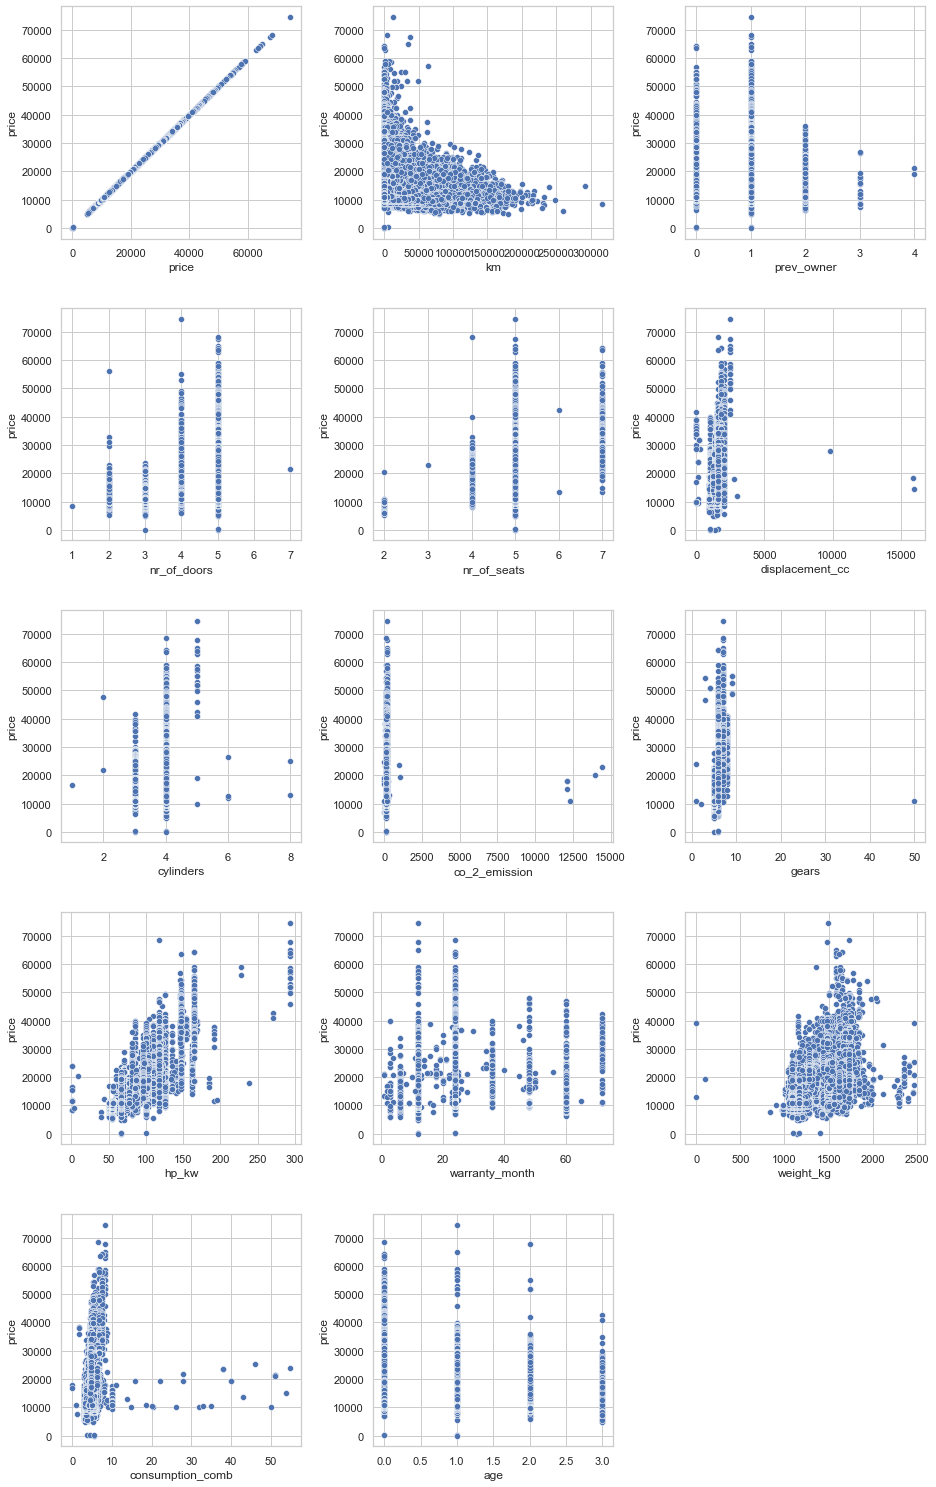

In [38]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

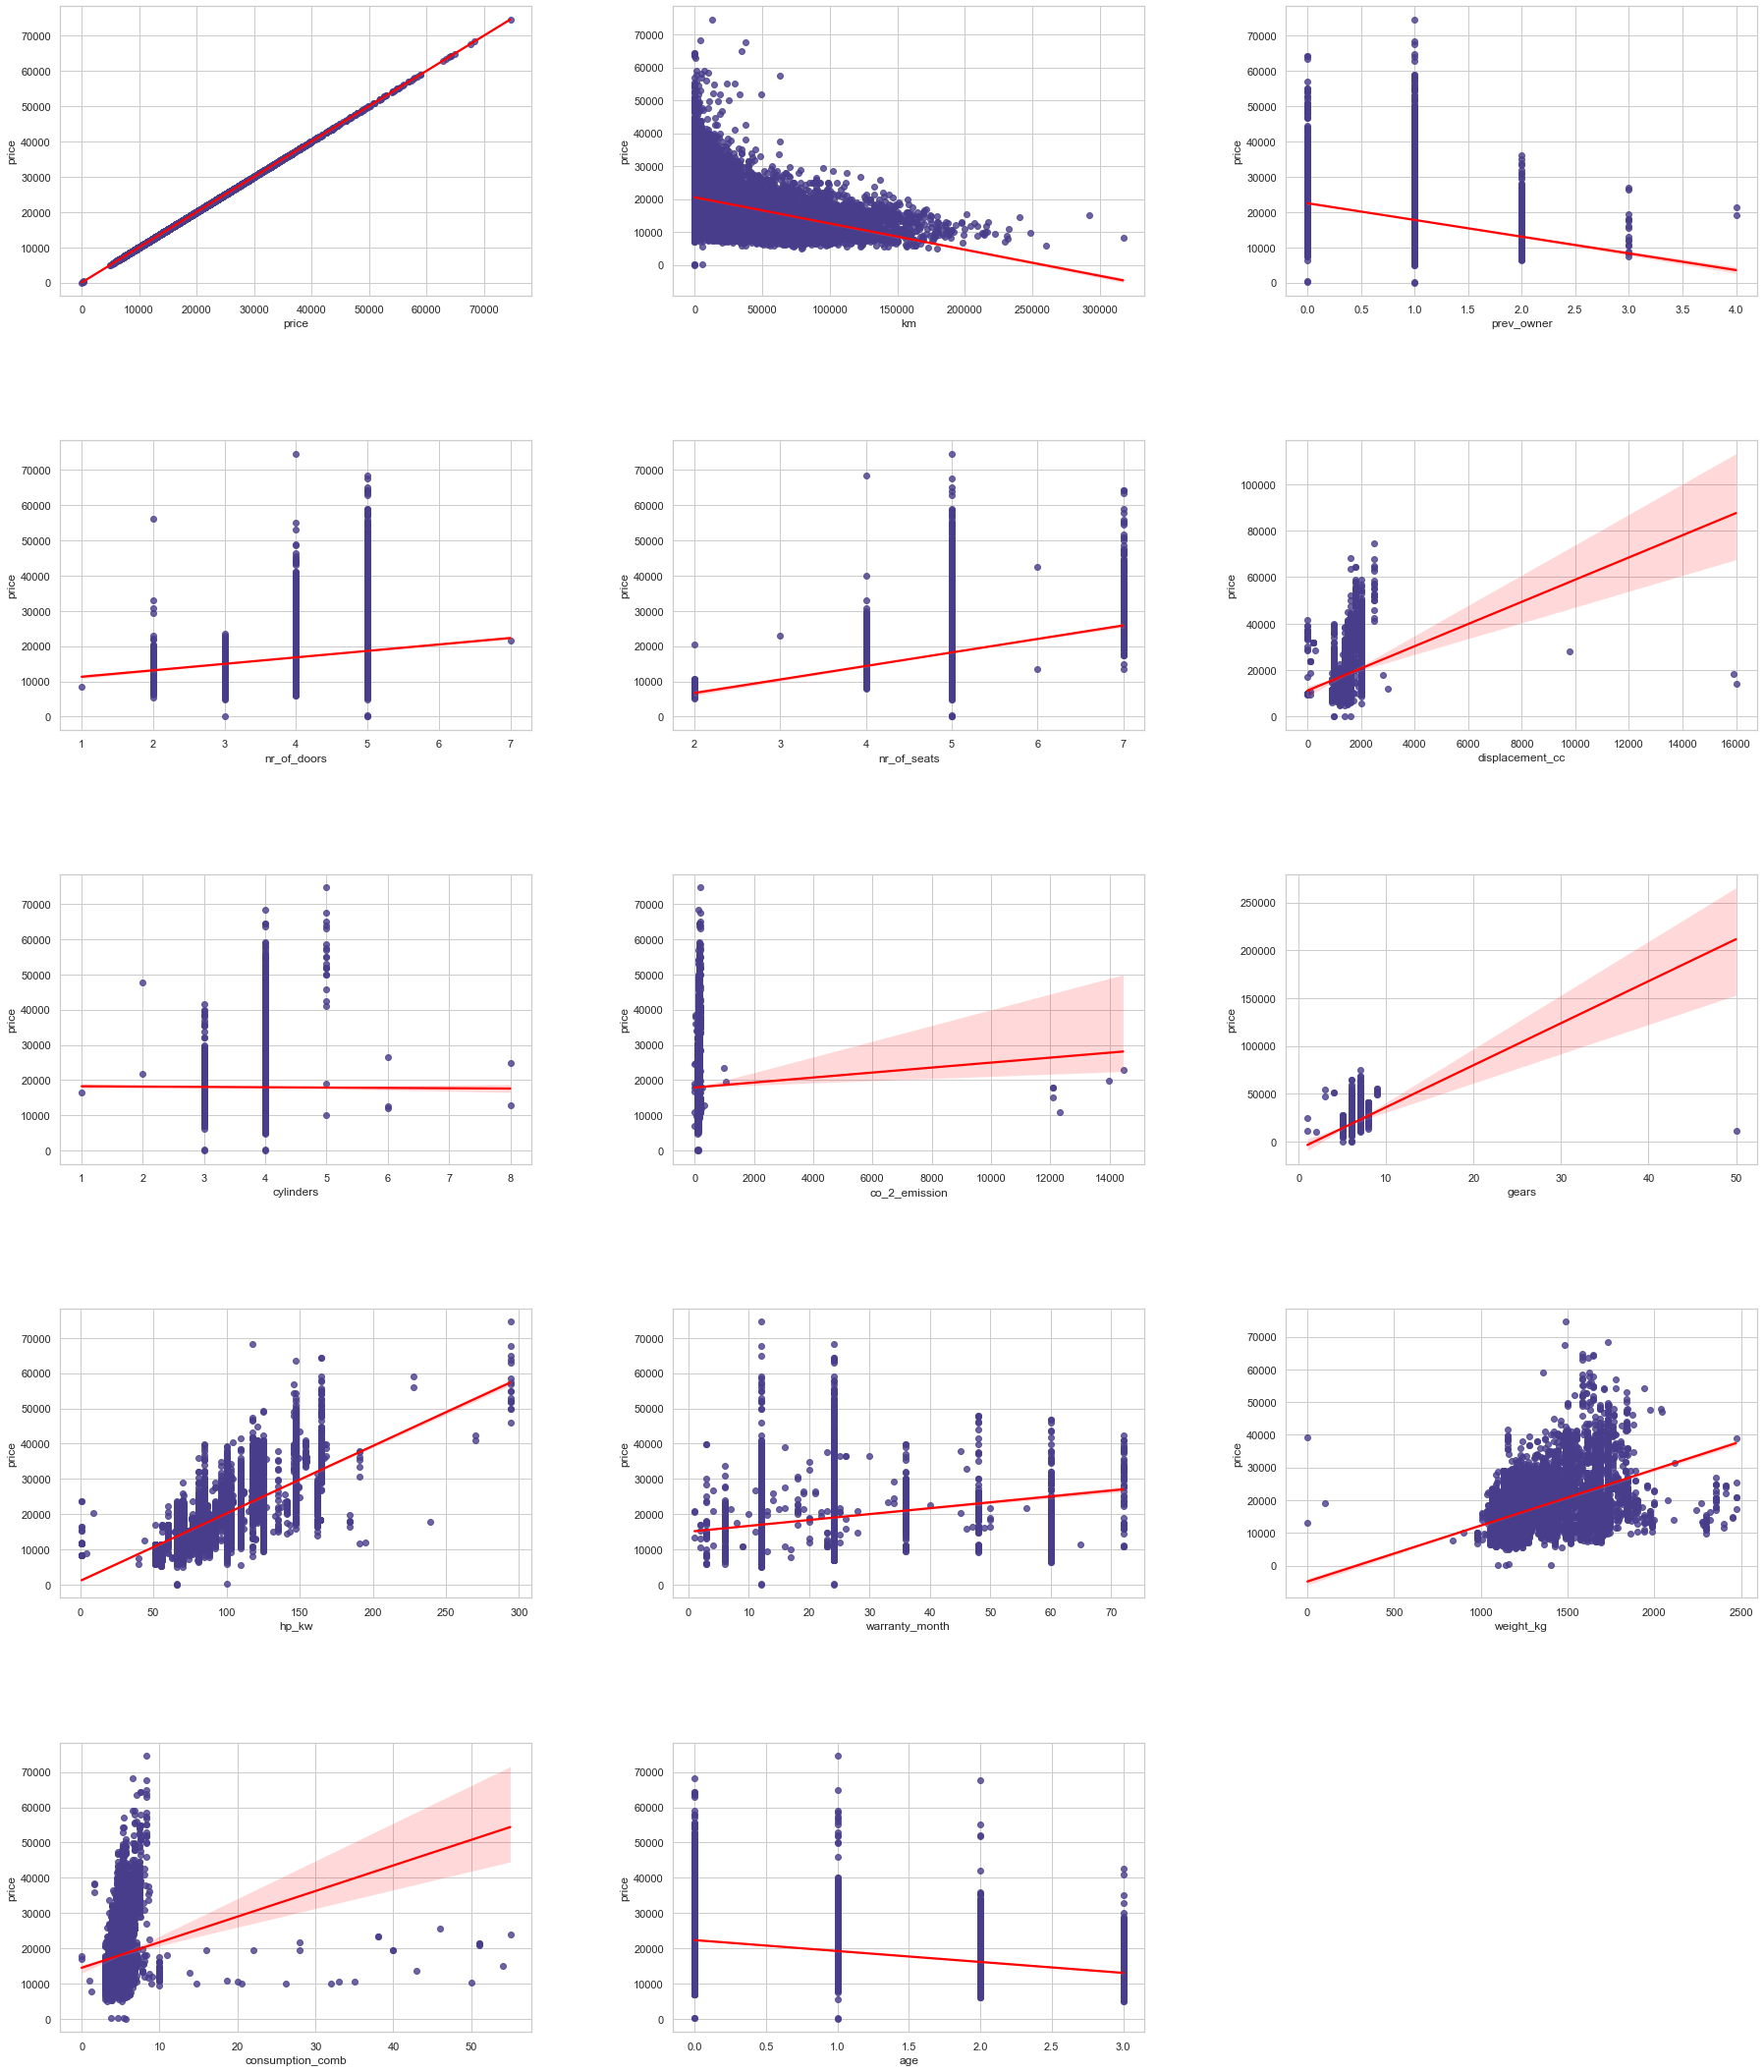

In [39]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

In [15]:
df_categoric= df.select_dtypes(include=["object"])

In [17]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15919 non-null  object
 1   body_type            15919 non-null  object
 2   vat                  15919 non-null  object
 3   type                 15919 non-null  object
 4   body_color           15919 non-null  object
 5   paint_type           15919 non-null  object
 6   gearing_type         15919 non-null  object
 7   drive_chain          15919 non-null  object
 8   fuel                 15919 non-null  object
 9   emission_class       15919 non-null  object
 10  comfort_convenience  15919 non-null  object
 11  entertainment_media  15919 non-null  object
 12  extras               15919 non-null  object
 13  safety_security      15919 non-null  object
 14  insp_new             15919 non-null  object
 15  upholstery_type      15919 non-null  object
 16  upho

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)